In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("xAPI-Edu-Data.csv")  
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

# Convert Categorical Data

In [8]:
df['gender'] = df['gender'].map({'F':1,'M':0})
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# Normalize / Scale Numerical Features

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_col = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
df[numeric_col] = scaler.fit_transform(df[numeric_col])
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.15,0.161616,0.020408,0.193878,Yes,Good,Under-7,M
1,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.20,0.202020,0.030612,0.244898,Yes,Good,Under-7,M
2,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.10,0.070707,0.000000,0.295918,No,Bad,Above-7,L
3,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.30,0.252525,0.051020,0.346939,No,Bad,Above-7,L
4,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.40,0.505051,0.122449,0.500000,No,Bad,Above-7,M


# Distributions

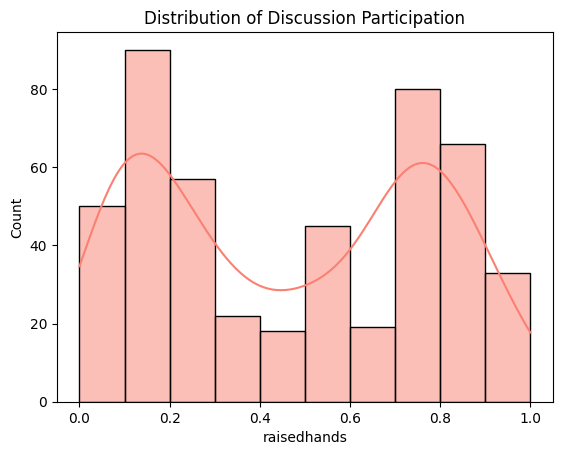

In [10]:
sns.histplot(df['raisedhands'],kde = True,color = 'salmon')
plt.title("Distribution of Discussion Participation")
plt.show()

# Correlations

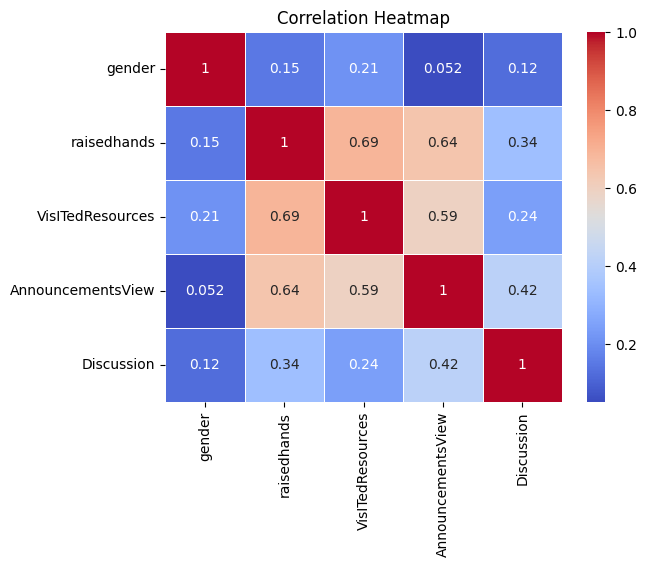

In [11]:
sns.heatmap(df.select_dtypes(include = 'number').corr(),annot = True,cmap = "coolwarm",linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.show()

# Grouped Comparisons

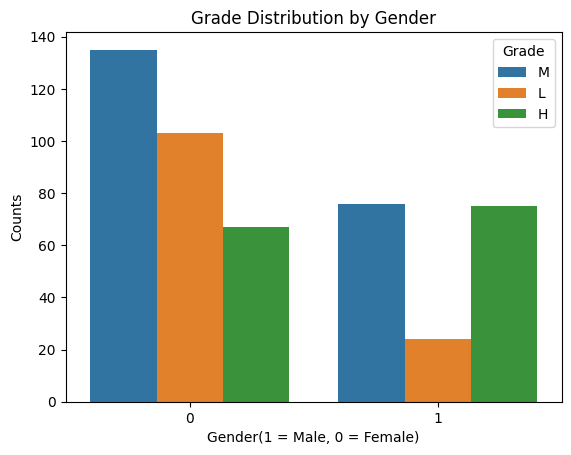

In [12]:
sns.countplot(data = df, x = 'gender', hue = 'Class')
plt.title("Grade Distribution by Gender")
plt.xlabel("Gender(1 = Male, 0 = Female)")
plt.ylabel("Counts")
plt.legend(title='Grade')
plt.show()

In [20]:
import streamlit as st
import numpy as np

df = pd.read_csv("xAPI-Edu-Data.csv")

# Sidebar filters
st.sidebar.title("Filter Options")
gender_filter = st.sidebar.selectbox("Select Gender", options=["All"] + df['gender'].unique().tolist())
class_filter = st.sidebar.selectbox("Select Grade", options=["All"] + df['Class'].unique().tolist())

# Apply filters
filtered_df = df.copy()
if gender_filter != "All":
    filtered_df = filtered_df[filtered_df['gender'] == gender_filter]
if class_filter != "All":
    filtered_df = filtered_df[filtered_df['Class'] == class_filter]

# Show filtered data
st.write("### Filtered Data", filtered_df)

# Plot
st.write("### Grade Distribution")
fig, ax = plt.subplots()
sns.countplot(data=filtered_df, x='gender', hue='Class', ax=ax)
plt.title("Grade Distribution by Gender")
st.pyplot(fig)

DeltaGenerator()